# K-최근접 이웃 (K-Nearest Neighbors, KNN)
- 분류(Classification)와 회귀(Regression) 를 모두 지원한다.
- 예측하려는 데이터와 Train set 데이터들 간의 거리를 측정해 가장 가까운 K개의 데이터셋의 레이블을 참조해 추론한다.
- 학습시 단순히 Train set 데이터들을 저장만 하며 예측 할 때 거리를 계산한다.
    - 학습은 빠르지만 예측시 시간이 많이 걸린다.


## 추론 알고리즘
### 분류

![knn1](images/knn-1.png)

- K-NN에서 **K**는 새로운 데이터포인트를 분류할때 확인할 데이터 포인트의 개수를 지정하는 **하이퍼파라미터**

![knn-2](images/knn-2.png)

### 회귀

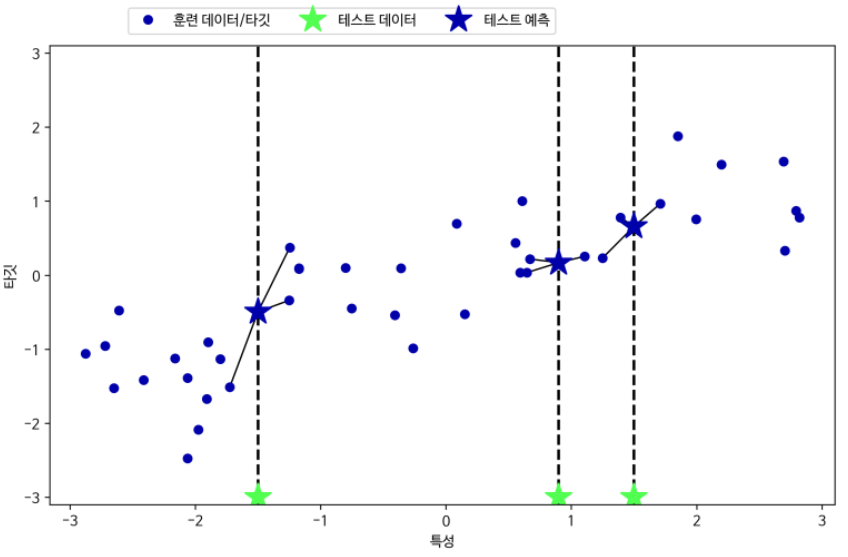

- **분류**
    - 추론할 feature들과 가까운 feature들로 구성된 data point K 개의 y중 다수의 class로 추론한다.
- **회귀**
    - 추론할 feature들과 가까운 feature들로 구성된 data point K 개의 y값의 평균값으로 추론한다.
- K가 너무 작으면 Overfitting이 일어날 수 있고 K가 너무 크면 Underfitting이 발생할 수 있다.
   

## 주요 하이퍼 파라미터
- **분류: sklearn.neighbors.KNeighborsClassifier**,  **회귀: sklearn.neighbors.KNeighborsRegressor**
- **이웃 수** 
    - n_neighbors = K
    - **K가 작을 수록 이상치에 반응할 가능이 높아져 overfitting 수 있다. K가 너무 크면 너무 많은 데이터를 바탕으로 추론하게 되므로 모델의 성능이 나빠져 underfitting이 발생할 수 있다.**
      - **Overfitting**: K값을 더 크게 잡는다.
      - **Underfitting**: K값을 더 작게 잡는다.
    - n_neighbors는 Feature수의 제곱근 정도를 지정할 때 성능이 좋은 것으로 알려져 있다.
- **거리 재는 방법** 
    - p=2: 유클리디안 거리(Euclidean distance - 기본값 - L2 Norm)
    - p=1: 맨하탄 거리(Manhattan distance - L1 Norm)
    

> ### 유클리디안 거리(Euclidean_distance)
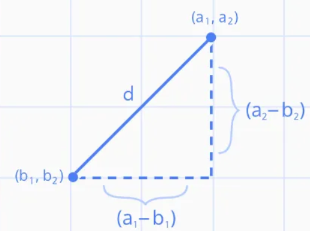

\begin{align}
&distance = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2}\\
&\text{n차원 벡터간의 거리} = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2 +...+(a_n-b_n)^2}
\end{align}

<center>같은 축의 값끼리 뺀다.</center>

> ### 맨하탄 거리 (Manhattan distance)
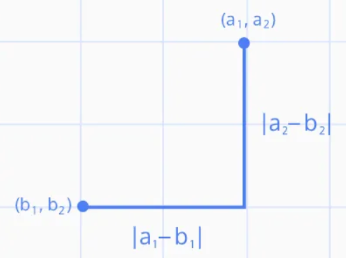

\begin{align}
&distance = |a_1 - b_1| + |a_2 - b_2| \\
&\text{𝑛차원벡터간의거리} = |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|
\end{align}

<center>같은 축의 값끼리 뺀다.</center>

## 요약
- K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수있다.
- K-NN은 서비스할 모델을 구현할때 보다는 **복잡한 알고리즘을 적용해 보기 전에 확인용 또는 base line을 잡기 위한 모델로 사용한다.**
- 훈련세트가 너무 큰 경우(Feature나 관측치의 개수가 많은 경우) 거리를 계산하는 양이 늘어나 예측이 느려진다.
    - 추론에 시간이 많이 걸린다.
- Feature간의 값의 단위가 다르면 작은 단위의 Feature에 영향을 많이 받게 되므로 **전처리로 Feature Scaling작업**이 필요하다.
- Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁘다

## KNN 이용한 모델링

- 데이터 전처리
  - 범주형: One Hot Encoding
  - 숫자형: Feature Scaling 

### 분류모델 모델링

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 모델링 
- K(n_neighbors) 값 변화에 따른 성능 변화 체크

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_list = range(1, 11)
train_acc_list, test_acc_list = [], []

for k in k_list:
    # k값 넣어서 모델 생성 
    knn = KNeighborsClassifier(n_neighbors=k)
    # 학습
    knn.fit(X_train_scaled, y_train)
    # 검증 -> 검증결과 LIST에 추가.
    train_acc_list.append(accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_acc_list.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

In [3]:
import pandas as pd
df = pd.DataFrame({
    "train":train_acc_list,
    "test":test_acc_list
}, index=k_list)
df.rename_axis(index="K", columns="Dataset", inplace=True)
df

Dataset,train,test
K,,
1,1.000000,0.951049
2,0.983568,0.930070
3,0.985915,0.951049
4,0.981221,0.965035
5,0.978873,0.951049
6,0.976526,0.951049
7,0.976526,0.958042
8,0.978873,0.951049
9,0.974178,0.951049


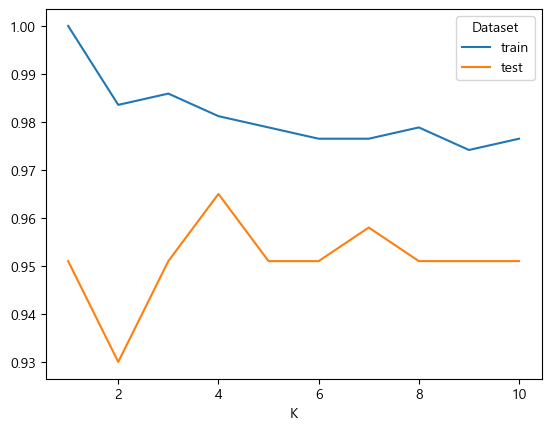

In [4]:
df.plot();

In [ ]:
X_train.shape

### 회귀모델 모델링

In [5]:
import pandas as pd

df = pd.read_csv("data/boston_dataset.csv")

X = df.drop(columns='MEDV').values
y = df['MEDV'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
### GridSearchCV로 최적 K값, p값 찾기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())
])
params = {
    "knn__n_neighbors":range(3, 10), 
    "knn__p":[1, 2]
}
gs = GridSearchCV(pipeline, params, scoring="neg_mean_squared_error", cv=4, n_jobs=-1)
gs.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'knn__n_neighbors': range(3, 10), 'knn__p': [1, 2]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [15]:
gs.best_params_

{'knn__n_neighbors': 3, 'knn__p': 1}

In [16]:
-gs.best_score_

np.float64(19.723329973870847)

In [17]:
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002251,0.000951,0.002139,0.000387,3,1,"{'knn__n_neighbors': 3, 'knn__p': 1}",-17.869111,-20.925006,-16.668257,-23.430946,-19.723330,2.643957,1
1,0.002305,0.001230,0.001587,0.000457,3,2,"{'knn__n_neighbors': 3, 'knn__p': 2}",-21.979462,-19.657556,-19.537415,-22.633298,-20.951933,1.374689,2
2,0.001575,0.000258,0.002134,0.000488,4,1,"{'knn__n_neighbors': 4, 'knn__p': 1}",-22.545316,-21.749092,-17.954493,-22.135253,-21.096038,1.835494,3
4,0.002702,0.000263,0.002353,0.000304,5,1,"{'knn__n_neighbors': 5, 'knn__p': 1}",-22.734248,-23.215878,-17.690640,-23.464477,-21.776311,2.373426,4
6,0.001593,0.000225,0.001377,0.000030,6,1,"{'knn__n_neighbors': 6, 'knn__p': 1}",-21.836538,-25.490251,-19.135915,-24.070201,-22.633226,2.402779,5


In [18]:
# 최종평가
from metrics import print_regression_metrcis

best_model = gs.best_estimator_

pred = best_model.predict(X_test)
print_regression_metrcis(y_test, pred, "최종평가")

최종평가
MSE: 17.779685039370072
RMSE: 4.216596380894201
R Squared: 0.7461029522045693
